In [22]:
import os, re, copy
from bigraph_viz import plot_bigraph, replace_regex_recursive, VisualizeTypes

plot_settings = {
    'remove_process_place_edges': True,
    'label_margin': '0.02',
    'dpi': '70',
}
save_images = True
if save_images:
    plot_settings.update({
        'out_dir': 'out',
        'dpi': '140'
    })

In [23]:
core = VisualizeTypes()

core.register('mmHg', 'string')
core.register('dyn/cm²', 'string')
core.register('µL/min', 'string')
core.register('mg/min', 'string')
core.register('fraction', 'string')
core.register('pg/cell·min', 'string')
core.register('dimensionless', 'string')
core.register('µm³/min', 'string')
core.register('µm/s', 'string')
core.register('µm²', 'string')
core.register('µm', 'string')
core.register('mPa·s', 'string')
core.register('cm/s', 'string')
core.register('ng/mL', 'string')
core.register('nM', 'string')
core.register('µM', 'string')
core.register('%', 'string')
core.register('HRA-3D-Segmentation-ID', 'string')
core.register('pg/mL', 'string')
core.register('mM', 'string')
core.register('µg/mL', 'string')
core.register('U/L', 'string')

# OpenVT simulator ↔ EFECT

In [24]:
# ------------------------------
# Bigraph doc for simulator ↔ EFECT
# ------------------------------

sim_names = [
    "Morpheus",
    "PhysiCell",
    "TissueForge",
    "TST",
    "Artistoo",
    "Chaste",
    "CompuCell3D",
]

bigraph_sim_efect = {
    # ---------- Object tree with example data ----------
    "experiment": {
        "initial_state": {
            "cells": 1200,
            "field_O2_mmHg": 40.0,
            "temperature_C": 37.0,
            # "seed": 42
        },
        "model_file": "cell sorting",
        "results": {
            # simulator-specific results buckets (to be written by processes)
            "morpheus_results": {},
            "physicell_results": {},
            "tissueforge_results": {},
            "tst_results": {},
            "artistoo_results": {},
            "chaste_results": {},
            "compucell3d_results": {}
        },
        "efect": {
            "outputs": {
                "summary": {},
                "comparative_metrics": {}
            }
        }
    },

    # ---------- Simulator processes (one per platform) ----------
    "Morpheus": {
        "_type": "process",
        "_inputs": {
            "initial_state": "any",
            "model_definition": "Morpheus/XML"
        },
        "_outputs": {
            "results": "SimulationResults"
        },
        "inputs": {
            "initial_state": ["experiment", "initial_state"],
            "model_definition": ["experiment", "model_file"]
        },
        "outputs": {
            "results": ["experiment", "results", "morpheus_results"]
        }
    },

    "PhysiCell": {
        "_type": "process",
        "_inputs": {
            "initial_state": "any",
            "model_definition": "PhysiCell/XML"
        },
        "_outputs": { "results": "SimulationResults" },
        "inputs": {
            "initial_state": ["experiment", "initial_state"],
            "model_definition": ["experiment", "model_file"]
        },
        "outputs": {
            "results": ["experiment", "results", "physicell_results"]
        }
    },

    "TissueForge": {
        "_type": "process",
        "_inputs": {
            "initial_state": "any",
            "model_definition": "Python module"
        },
        "_outputs": { "results": "SimulationResults" },
        "inputs": {
            "initial_state": ["experiment", "initial_state"],
            "model_definition": ["experiment", "model_file"]
        },
        "outputs": {
            "results": ["experiment", "results", "tissueforge_results"]
        }
    },

    "TST": {
        "_type": "process",
        "_inputs": {
            "initial_state": "any",
            "model_definition": "YAML"
        },
        "_outputs": { "results": "SimulationResults" },
        "inputs": {
            "initial_state": ["experiment", "initial_state"],
            "model_definition": ["experiment", "model_file"]
        },
        "outputs": {
            "results": ["experiment", "results", "tst_results"]
        }
    },

    "Artistoo": {
        "_type": "process",
        "_inputs": {
            "initial_state": "any",
            "model_definition": "JavaScript"
        },
        "_outputs": { "results": "SimulationResults" },
        "inputs": {
            "initial_state": ["experiment", "initial_state"],
            "model_definition": ["experiment", "model_file"]
        },
        "outputs": {
            "results": ["experiment", "results", "artistoo_results"]
        }
    },

    "Chaste": {
        "_type": "process",
        "_inputs": {
            "initial_state": "any",
            "model_definition": "C++/SharedObject"
        },
        "_outputs": { "results": "SimulationResults" },
        "inputs": {
            "initial_state": ["experiment", "initial_state"],
            "model_definition": ["experiment", "model_file"]
        },
        "outputs": {
            "results": ["experiment", "results", "chaste_results"]
        }
    },

    "CompuCell3D": {
        "_type": "process",
        "_inputs": {
            "initial_state": "any",
            "model_definition": "CC3D"
        },
        "_outputs": { "results": "SimulationResults" },
        "inputs": {
            "initial_state": ["experiment", "initial_state"],
            "model_definition": ["experiment", "model_file"]
        },
        "outputs": {
            "results": ["experiment", "results", "compucell3d_results"]
        }
    },

    # ---------- EFECT process (reads all *_results) ----------
    "EFECT": {
        "_type": "process",
        "_inputs": {
            "results": "map[SimulationResults]",
        },
        "_outputs": {
            "summary": "Report",
            "comparative_metrics": "Table"
        },
        "inputs": {
            "results":   ["experiment", "results"],
        },
        "outputs": {
            "summary":            ["experiment", "efect", "outputs", "summary"],
            "comparative_metrics":["experiment", "efect", "outputs", "comparative_metrics"]
        }
    }
}

core.register('Morpheus/XML', 'string')
core.register('SimulationResults', 'string')
core.register('Python module', 'string')
core.register('PhysiCell/XML', 'string')
core.register('YAML', 'string')
core.register('JavaScript', 'string')
core.register('C++/SharedObject', 'string')
core.register('CC3D', 'string')
core.register('Report', 'string')
core.register('Table', 'string')




Writing out/simulators_to_efect


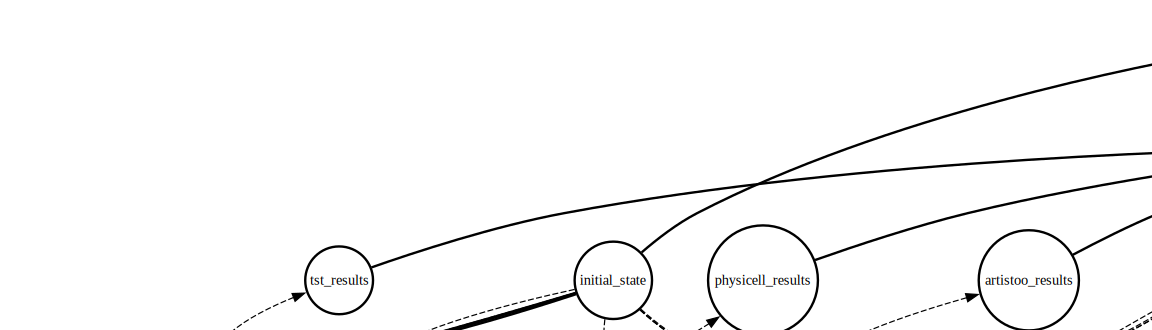

In [25]:
plot_bigraph(bigraph_sim_efect, core=core, **plot_settings, filename="simulators_to_efect")

In [26]:
# =========================
# Open VT–aligned processes
# =========================

# ---- FIELDS ----

FIELD_DIFFUSION_DECAY = {
    "name": "field_diffusion_decay",
    "_type": "process",
    "category": "Fields",
    "properties": ["Concentration", "Diffusion Constants", "Decay Constants"],
    "behaviors": ["Diffusion", "Decay"],
    "interactions": [],
    "dynamics": ["Diffusion Equation"],
    "initial_conditions": ["Value everywhere"],
    "boundary_conditions": ["Periodic", "Reflecting", "Absorbing", "Constant Flux"],
    "_inputs": {
        "field_concentration": "Concentration[mM] grid",
        "diffusion_constant": "DiffusionConstant[µm^2/s] grid_or_scalar",
        "decay_constant": "DecayConstant[1/s] grid_or_scalar",
        "dx": "Length[µm]",
        "dt": "Time[s]",
        "boundary_condition": "BoundaryCondition{periodic|reflecting|absorbing|flux}",
        "constant_flux": "Flux[mM·µm/s] (used if boundary_condition=flux)"
    },
    "_outputs": {
        "dcdt": "RateOfChange[mM/s] grid",
        "field_concentration_next": "Concentration[mM] grid"
    }
}

FIELD_ADVECTION = {
    "name": "field_advection",
    "_type": "process",
    "category": "Fields",
    "properties": ["Concentration"],
    "behaviors": [],
    "interactions": ["Advection"],
    "dynamics": ["Diffusion Equation (advection term)"],
    "initial_conditions": ["Value everywhere"],
    "boundary_conditions": ["Periodic", "Reflecting", "Absorbing"],
    "_inputs": {
        "field_concentration": "Concentration[mM] grid",
        "velocity_field": "Velocity[µm/s] vector_grid",
        "dx": "Length[µm]",
        "dt": "Time[s]",
        "boundary_condition": "BoundaryCondition{periodic|reflecting|absorbing}"
    },
    "_outputs": {
        "advection_term": "RateOfChange[mM/s] grid",
        "field_concentration_next": "Concentration[mM] grid"
    }
}

FIELD_REACTION_SECRETION_ABSORPTION = {
    "name": "field_reaction_secretion_absorption",
    "_type": "process",
    "category": "Fields",
    "properties": ["Concentration"],
    "behaviors": ["Secretion", "Absorption"],
    "interactions": ["Reaction", "Secretion", "Absorption"],
    "dynamics": ["Reaction terms (mass-action or custom)"],
    "initial_conditions": ["Value everywhere"],
    "boundary_conditions": ["Periodic", "Reflecting", "Absorbing"],
    "_inputs": {
        "field_concentration": "Concentration[mM] grid",
        "reaction_stoichiometry": "StoichiometryMatrix[dimensionless]",
        "forward_rates": "RateConstant[(mM^{1-n})/s] list",
        "reverse_rates": "RateConstant[(mM^{1-n})/s] list (optional)",
        "cell_secretion_map": "SecretionRate[mM/s] grid (from cells)",
        "cell_absorption_map": "AbsorptionRate[mM/s] grid (from cells)",
        "dt": "Time[s]"
    },
    "_outputs": {
        "reaction_term": "RateOfChange[mM/s] grid",
        "source_term": "RateOfChange[mM/s] grid",
        "sink_term": "RateOfChange[mM/s] grid",
        "field_concentration_next": "Concentration[mM] grid"
    }
}

# ---- CELLS ----

CELL_MOTILITY = {
    "name": "cell_motility",
    "_type": "process",
    "category": "Cells",
    "properties": ["Position", "Polarity"],
    "behaviors": ["Motility"],
    "interactions": ["Chemotaxis", "External Forces"],
    "dynamics": ["Force-velocity relation", "Stochastic forcing"],
    "events": [],
    "initial_conditions": ["Position, shape and type of each cell", "Parameters for motility"],
    "boundary_conditions": ["Periodic", "No flux"],
    "_inputs": {
        "cell_positions": "Position[µm] list(Nx3 or Nx2)",
        "cell_polarity": "Direction[unit] list",
        "chemotaxis_field": "Concentration[mM] grid",
        "chemotaxis_sensitivity": "Sensitivity[(µm^2)/(s·mM)] scalar_or_list",
        "drag_coefficient": "Friction[N·s/µm] scalar_or_list",
        "random_force_std": "Force[N] scalar",
        "external_forces": "Force[N] list (optional)",
        "dt": "Time[s]"
    },
    "_outputs": {
        "cell_velocities": "Velocity[µm/s] list",
        "cell_positions_next": "Position[µm] list"
    }
}

CELL_GROWTH_DIVISION_DEATH = {
    "name": "cell_growth_division_death",
    "_type": "process",
    "category": "Cells",
    "properties": ["Volume", "Cell Type", "Substructure"],
    "behaviors": ["Growth", "Division", "Death"],
    "interactions": [],
    "dynamics": ["Rate laws for internal properties"],
    "events": ["Cell Division", "Cell Death and Disappearance"],
    "initial_conditions": ["Initial volumes/types", "Rate parameters"],
    "boundary_conditions": ["Periodic", "No flux"],
    "_inputs": {
        "cell_volumes": "Volume[µm^3] list",
        "growth_rates": "Rate[1/s] list_or_scalar",
        "division_thresholds": "Volume[µm^3] list_or_scalar",
        "death_signals": "Signal[dimensionless or mM] list_or_scalar",
        "dt": "Time[s]"
    },
    "_outputs": {
        "cell_volumes_next": "Volume[µm^3] list",
        "division_events": "Event[CellDivision] list",
        "death_events": "Event[CellDeath] list",
        "new_cells": "CellRecords[...] list",
        "removed_cells": "CellIDs list"
    }
}

CELL_ADHESION_MECHANICS = {
    "name": "cell_adhesion_mechanics",
    "_type": "process",
    "category": "Cells",
    "properties": ["Position", "Surface Area", "Elasticity", "Viscosity"],
    "behaviors": [],
    "interactions": ["Adhesion", "External Forces"],
    "dynamics": ["Force-velocity relation"],
    "events": [],
    "initial_conditions": ["Positions, contact graph, mechanical params"],
    "boundary_conditions": ["Periodic", "No flux"],
    "_inputs": {
        "cell_positions": "Position[µm] list",
        "neighbor_graph": "Graph[adjacency] cells",
        "adhesion_matrix": "AdhesionStrength[N/µm^2] NxN",
        "elastic_modulus": "Elasticity[Pa] list_or_scalar",
        "viscous_drag": "Coefficient[N·s/µm] list_or_scalar",
        "external_forces": "Force[N] list_or_scalar",
        "dt": "Time[s]"
    },
    "_outputs": {
        "contact_forces": "Force[N] list",
        "cell_velocities": "Velocity[µm/s] list",
        "cell_positions_next": "Position[µm] list"
    }
}

# ---- DYNAMIC NETWORKS (Signaling / Metabolic / GRN) ----

NETWORK_MASS_ACTION_ODE = {
    "name": "network_mass_action_ode",
    "_type": "process",
    "category": "DynamicNetworks",
    "properties": ["Concentrations", "Amounts"],
    "behaviors": ["Decay"],
    "interactions": ["Reaction", "Activation", "Inhibition"],
    "dynamics": ["Rate Equations (ODE)"],
    "events": ["External Addition or Subtraction of Amounts"],
    "initial_conditions": ["Initial Concentrations/Amounts", "Sources/Sinks"],
    "boundary_conditions": ["Passage of Amounts between networks"],
    "_inputs": {
        "species_conc": "Concentration[mM] vector",
        "stoichiometry_matrix": "StoichiometryMatrix[dimensionless]",
        "forward_rates": "RateConstant[(mM^{1-n})/s] vector",
        "reverse_rates": "RateConstant[(mM^{1-n})/s] vector (optional)",
        "decay_rates": "Rate[1/s] vector (optional)",
        "external_sources": "ProductionRate[mM/s] vector (optional)",
        "external_sinks": "RemovalRate[mM/s] vector (optional)",
        "dt": "Time[s]"
    },
    "_outputs": {
        "dcdt": "RateOfChange[mM/s] vector",
        "species_conc_next": "Concentration[mM] vector"
    }
}

NETWORK_GILLESPIE = {
    "name": "network_gillespie",
    "_type": "process",
    "category": "DynamicNetworks",
    "properties": ["Amounts"],
    "behaviors": ["Decay"],
    "interactions": ["Reaction", "Activation", "Inhibition"],
    "dynamics": ["Gillespie Algorithm"],
    "events": ["External Addition or Subtraction of Amounts", "Changes of Architecture"],
    "initial_conditions": ["Initial Amounts", "Propensity parameters"],
    "boundary_conditions": ["Passage of Amounts between networks"],
    "_inputs": {
        "species_counts": "Amount[molecules] vector",
        "propensity_params": "Propensity[1/s] or function set",
        "stoichiometry_matrix": "StoichiometryMatrix[dimensionless]",
        "t_max_step": "Time[s]"
    },
    "_outputs": {
        "event_counts": "Amount[molecules] vector_delta",
        "tau": "Time[s]",
        "species_counts_next": "Amount[molecules] vector"
    }
}

NETWORK_BOOLEAN_UPDATE = {
    "name": "network_boolean_update",
    "_type": "process",
    "category": "DynamicNetworks",
    "properties": ["Node State (0/1)"],
    "behaviors": [],
    "interactions": ["Activation", "Inhibition"],
    "dynamics": ["Boolean Updates (sync/async)"],
    "events": ["Changes of Architecture"],
    "initial_conditions": ["Initial node states"],
    "boundary_conditions": ["State passage between subnetworks"],
    "_inputs": {
        "node_states": "State{0|1} vector",
        "logic_rules": "BooleanFunctions set",
        "update_scheme": "Enum{sync|async}",
        "dt": "Time[s]"
    },
    "_outputs": {
        "node_states_next": "State{0|1} vector"
    }
}

NETWORK_EXTERNAL_PERTURBATION = {
    "name": "network_external_perturbation",
    "_type": "process",
    "category": "DynamicNetworks",
    "properties": ["Concentrations", "Amounts"],
    "behaviors": [],
    "interactions": ["External Addition/Removal"],
    "dynamics": ["Impulse/step schedules"],
    "events": ["External Addition or Subtraction of Amounts"],
    "initial_conditions": ["Perturbation schedule"],
    "boundary_conditions": ["Passage of Amounts between networks"],
    "_inputs": {
        "target": "Enum{species_index|node_id|field_name}",
        "delta": "Change[mM or molecules] value",
        "schedule": "TimeSchedule[list of (t, delta)]",
        "t": "Time[s]"
    },
    "_outputs": {
        "applied": "Bool",
        "delta_applied": "Change[mM or molecules] value"
    }
}

# =======================
# Unified processes index
# =======================

PROCESSES_REGISTRY = {
    # Fields
    FIELD_DIFFUSION_DECAY["name"]: FIELD_DIFFUSION_DECAY,
    FIELD_ADVECTION["name"]: FIELD_ADVECTION,
    FIELD_REACTION_SECRETION_ABSORPTION["name"]: FIELD_REACTION_SECRETION_ABSORPTION,

    # Cells
    CELL_MOTILITY["name"]: CELL_MOTILITY,
    CELL_GROWTH_DIVISION_DEATH["name"]: CELL_GROWTH_DIVISION_DEATH,
    CELL_ADHESION_MECHANICS["name"]: CELL_ADHESION_MECHANICS,

    # Dynamic Networks
    NETWORK_MASS_ACTION_ODE["name"]: NETWORK_MASS_ACTION_ODE,
    NETWORK_GILLESPIE["name"]: NETWORK_GILLESPIE,
    NETWORK_BOOLEAN_UPDATE["name"]: NETWORK_BOOLEAN_UPDATE,
    NETWORK_EXTERNAL_PERTURBATION["name"]: NETWORK_EXTERNAL_PERTURBATION,
}


In [27]:
import os, re, copy
from typing import Dict, Any

def _slugify(name: str) -> str:
    s = name.strip().lower()
    s = re.sub(r"[^a-z0-9]+", "_", s)
    return s.strip("_") or "process"

def plot_all_processes_standalone(
    processes_registry: Dict[str, Dict[str, Any]],
    core,
    plot_settings: Dict[str, Any],
    outdir: str = "process_bigraphs",
    ensure_process_type: bool = True,
):
    """
    For each process in the registry, create a minimal document that contains ONLY that process
    and render it as a standalone bigraph diagram (no object graph).

    - processes_registry: dict like {name: process_dict}
    - core: your core/context object used by plot_bigraph(...)
    - plot_settings: dict of plotting options for plot_bigraph(...)
    - outdir: output directory for images
    - ensure_process_type: if True, force '_type' == 'process' on each node
    """
    os.makedirs(outdir, exist_ok=True)

    for name, proc in processes_registry.items():
        node_key = proc.get("name", name)
        proc_body = {k: v for k, v in proc.items() if k != "name"}

        if ensure_process_type and proc_body.get("_type") != "process":
            proc_body["_type"] = "process"

        # Minimal document: just the single process node
        doc = {node_key: proc_body}

        # Fresh settings per diagram
        settings = copy.deepcopy(plot_settings)

        # Filename without extension (plot_bigraph can append as needed)
        filename = os.path.join(outdir, _slugify(node_key))

        # Render
        plot_bigraph(doc, core=core, **settings, filename=filename)
        print(f"Rendered standalone process: {filename}")

# ----------------------
# Example usage:
# ----------------------
plot_all_processes_standalone(
    processes_registry=PROCESSES_REGISTRY,
    core=core,
    plot_settings=plot_settings,
    outdir="process_bigraphs",
)


Writing out/process_bigraphs/field_diffusion_decay
Rendered standalone process: process_bigraphs/field_diffusion_decay
Writing out/process_bigraphs/field_advection
Rendered standalone process: process_bigraphs/field_advection
Writing out/process_bigraphs/field_reaction_secretion_absorption
Rendered standalone process: process_bigraphs/field_reaction_secretion_absorption
Writing out/process_bigraphs/cell_motility
Rendered standalone process: process_bigraphs/cell_motility
Writing out/process_bigraphs/cell_growth_division_death
Rendered standalone process: process_bigraphs/cell_growth_division_death
Writing out/process_bigraphs/cell_adhesion_mechanics
Rendered standalone process: process_bigraphs/cell_adhesion_mechanics
Writing out/process_bigraphs/network_mass_action_ode
Rendered standalone process: process_bigraphs/network_mass_action_ode
Writing out/process_bigraphs/network_gillespie
Rendered standalone process: process_bigraphs/network_gillespie
Writing out/process_bigraphs/network_b

Writing out/cell_atlas_kidney


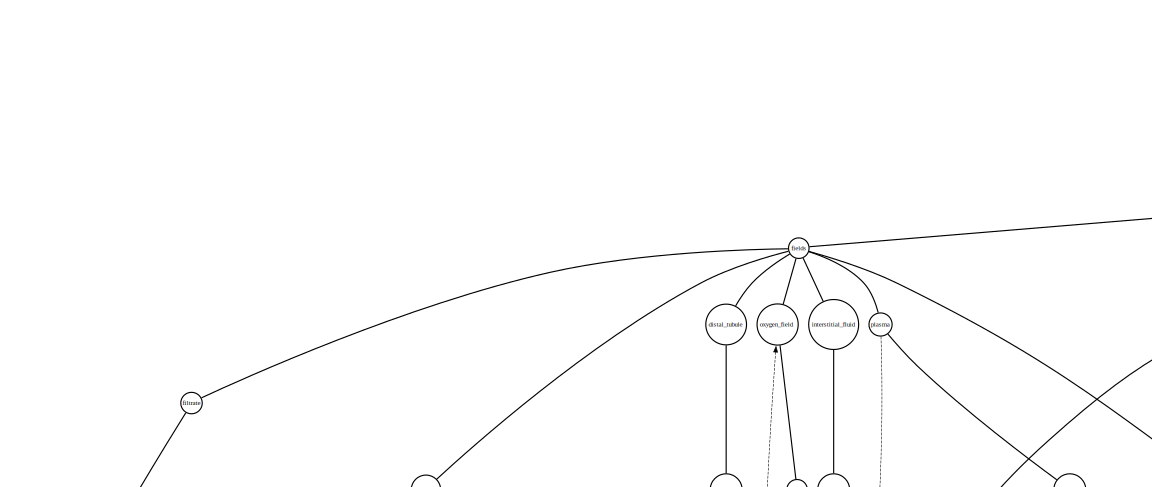

In [28]:
human_atlas_kidney = {
  "kidney": {
    "region": {
      "cortex": {
        "nephron": {
          "glomerulus": {
            "anatomy": {
              "afferent_arteriole": {},
              "efferent_arteriole": {},
              "capillary_loop": {},
              "mesangium": {},
              "glomerular_basement_membrane": {},
              "bowman_capsule": {
                "parietal_epithelium": {},
                "bowman_space": {
                  "properties": {
                    "pressure_mmHg": "measured"
                  }
                }
              },
              "juxtaglomerular_apparatus": {
                "macula_densa_epithelium": {},
                "extraglomerular_mesangium": {}
              }
            },
            "cells": {
              "fenestrated_endothelial_cell": {},
              "podocyte": {
                "foot_process": { "slit_diaphragm": {} }
              },
              "mesangial_cell": {},
              "parietal_epithelial_cell": {},
              "juxtaglomerular_cell": {},
              "extraglomerular_mesangial_cell": {},
              "resident_macrophage": {}
            },
            "fields": {
              "plasma": {
                "properties": {
                  "pressure_mmHg": '55',
                  "flow_uL_per_min": "measured",
                  "viscosity_mPa_s": "measured",
                  "oncotic_pressure_mmHg": "measured"
                }
              },
              "filtrate": {
                "properties": {
                  "pressure_mmHg": '10',
                  "flow_uL_per_min": "derived",
                  "albumin_mg_per_mL": "derived"
                }
              },
              "interstitial_fluid": {
                "properties": { "osm_mOsm_per_L": '300' }
              },
              "cytokine_field": {},
              "oxygen_field": { "units": "mmHg" },
              "distal_tubule": {
                "properties": {
                  "NaCl_mM": "measured",
                  "flow_uL_per_min": "measured"
                }
              },
              "signaling": {
                "NO_uM": "derived",
                "endothelin_pg_per_mL": "derived",
                "adenosine_uM": "derived",
                "ATP_uM": "derived",
                "renin_ng_per_mL": "derived",
                "angiotensinogen_ug_per_mL": "measured",
                "ACE_activity_U_per_L": "measured",
                "angiotensin_II_nM": "derived"
              }
            }
          }
        }
      }
    }
  },

  # ----------------------- Core fluid/flux processes -----------------------

  "hemodynamics": {
    "_type": "process",
    "_inputs": {
      "arterial_inflow": "µL/min",
      "capillary_radius": "µm",
      "viscosity": "mPa·s",
      "capillary_tone": "dimensionless"
    },
    "_outputs": {
      "capillary_pressure_profile": "mmHg",
      "shear_stress": "dyn/cm²"
    },
    "inputs": {
      "arterial_inflow": [
        "kidney","region","cortex","nephron","glomerulus",
        "fields","plasma","properties","flow_uL_per_min"
      ],
      "capillary_radius": [
        "kidney","region","cortex","nephron","glomerulus",
        "anatomy","capillary_loop"
      ],
      "viscosity": [
        "kidney","region","cortex","nephron","glomerulus",
        "fields","plasma","properties","viscosity_mPa_s"
      ],
      "capillary_tone": [
        "kidney","region","cortex","nephron","glomerulus",
        "anatomy","capillary_loop"
      ]
    },
    "outputs": {
      "capillary_pressure_profile": [
        "kidney","region","cortex","nephron","glomerulus",
        "fields","plasma","properties","pressure_mmHg"
      ],
      "shear_stress": [
        "kidney","region","cortex","nephron","glomerulus",
        "cells","fenestrated_endothelial_cell"
      ]
    }
  },

  "glomerular_filtration": {
    "_type": "process",
    "_inputs": {
      "plasma_pressure": "mmHg",
      "oncotic_pressure": "mmHg",
      "bowman_pressure": "mmHg",
      "gbm_permeability": "cm/s",
      "slit_diaphragm_selectivity": "µm",
      "surface_area": "µm²"
    },
    "_outputs": {
      "filtration_rate": "µL/min",
      "albumin_flux": "mg/min"
    },
    "inputs": {
      "plasma_pressure": [
        "kidney","region","cortex","nephron","glomerulus",
        "fields","plasma","properties","pressure_mmHg"
      ],
      "oncotic_pressure": [
        "kidney","region","cortex","nephron","glomerulus",
        "fields","plasma","properties","oncotic_pressure_mmHg"
      ],
      "bowman_pressure": [
        "kidney","region","cortex","nephron","glomerulus",
        "anatomy","bowman_capsule","bowman_space","properties","pressure_mmHg"
      ],
      "gbm_permeability": [
        "kidney","region","cortex","nephron","glomerulus",
        "anatomy","glomerular_basement_membrane"
      ],
      "slit_diaphragm_selectivity": [
        "kidney","region","cortex","nephron","glomerulus",
        "cells","podocyte","foot_process","slit_diaphragm"
      ],
      "surface_area": [
        "kidney","region","cortex","nephron","glomerulus",
        "anatomy","capillary_loop"
      ]
    },
    "outputs": {
      "filtration_rate": [
        "kidney","region","cortex","nephron","glomerulus",
        "fields","filtrate","properties","flow_uL_per_min"
      ],
      "albumin_flux": [
        "kidney","region","cortex","nephron","glomerulus",
        "fields","filtrate","properties","albumin_mg_per_mL"
      ]
    }
  },

  "podocyte_response": {
    "_type": "process",
    "_inputs": {
      "shear_stress": "dyn/cm²",
      "vegf_signal": "ng/mL"
    },
    "_outputs": {
      "slit_diaphragm_integrity": "fraction",
      "cytokine_secretion": "pg/cell·min"
    },
    "inputs": {
      "shear_stress": [
        "kidney","region","cortex","nephron","glomerulus",
        "cells","fenestrated_endothelial_cell"
      ],
      "vegf_signal": [
        "kidney","region","cortex","nephron","glomerulus",
        "fields","cytokine_field"
      ]
    },
    "outputs": {
      "slit_diaphragm_integrity": [
        "kidney","region","cortex","nephron","glomerulus",
        "cells","podocyte","foot_process","slit_diaphragm"
      ],
      "cytokine_secretion": [
        "kidney","region","cortex","nephron","glomerulus",
        "fields","cytokine_field"
      ]
    }
  },

  "mesangial_contractility": {
    "_type": "process",
    "_inputs": {
      "angII": "nM",
      "intracellular_ca2+": "µM"
    },
    "_outputs": {
      "capillary_tone": "dimensionless",
      "matrix_remodeling_rate": "µm³/min"
    },
    "inputs": {
      "angII": [
        "kidney","region","cortex","nephron","glomerulus",
        "fields","signaling","angiotensin_II_nM"
      ],
      "intracellular_ca2+": [
        "kidney","region","cortex","nephron","glomerulus",
        "cells","mesangial_cell"
      ]
    },
    "outputs": {
      "capillary_tone": [
        "kidney","region","cortex","nephron","glomerulus",
        "anatomy","capillary_loop"
      ],
      "matrix_remodeling_rate": [
        "kidney","region","cortex","nephron","glomerulus",
        "anatomy","mesangium"
      ]
    }
  },

  "oxygen_transport": {
    "_type": "process",
    "_inputs": {
      "blood_flow": "µL/min",
      "hemoglobin_saturation": "%",
      "capillary_distance": "µm"
    },
    "_outputs": { "po2_gradient": "mmHg" },
    "inputs": {
      "blood_flow": [
        "kidney","region","cortex","nephron","glomerulus",
        "fields","plasma","properties","flow_uL_per_min"
      ],
      "hemoglobin_saturation": [
        "kidney","region","cortex","nephron","glomerulus",
        "fields","plasma"
      ],
      "capillary_distance": [
        "kidney","region","cortex","nephron","glomerulus",
        "anatomy","capillary_loop"
      ]
    },
    "outputs": {
      "po2_gradient": [
        "kidney","region","cortex","nephron","glomerulus",
        "fields","oxygen_field"
      ]
    }
  },

  "ai_surrogate_renal_flow": {
    "_type": "process",
    "_inputs": {
      "geometry_mesh": "HRA-3D-Segmentation-ID",
      "boundary_conditions": "mmHg",
      "viscosity": "mPa·s"
    },
    "_outputs": {
      "flow_field": "µm/s",
      "pressure_field": "mmHg"
    },
    "inputs": {
      "geometry_mesh": [
        "kidney","region","cortex","nephron","glomerulus",
        "anatomy","capillary_loop"
      ],
      "boundary_conditions": [
        "kidney","region","cortex","nephron","glomerulus",
        "anatomy","afferent_arteriole"
      ],
      "viscosity": [
        "kidney","region","cortex","nephron","glomerulus",
        "fields","plasma","properties","viscosity_mPa_s"
      ]
    },
    "outputs": {
      "flow_field": [
        "kidney","region","cortex","nephron","glomerulus",
        "fields","plasma","properties","flow_uL_per_min"
      ],
      "pressure_field": [
        "kidney","region","cortex","nephron","glomerulus",
        "fields","plasma","properties","pressure_mmHg"
      ]
    }
  },

  # ----------------------- Added cell–cell interactions -----------------------

  "endothelial_no_endothelin": {
    "_type": "process",
    "_inputs": { "shear_stress": "dyn/cm²" },
    "_outputs": { "NO_uM": "µM", "endothelin_pg_per_mL": "pg/mL" },
    "inputs": {
      "shear_stress": [
        "kidney","region","cortex","nephron","glomerulus",
        "cells","fenestrated_endothelial_cell"
      ]
    },
    "outputs": {
      "NO_uM": [
        "kidney","region","cortex","nephron","glomerulus",
        "fields","signaling","NO_uM"
      ],
      "endothelin_pg_per_mL": [
        "kidney","region","cortex","nephron","glomerulus",
        "fields","signaling","endothelin_pg_per_mL"
      ]
    }
  },

  "tubuloglomerular_feedback": {
    "_type": "process",
    "_inputs": { "NaCl_mM": "mM", "flow_dt_uL_per_min": "µL/min" },
    "_outputs": { "adenosine_uM": "µM", "ATP_uM": "µM", "afferent_tone": "dimensionless" },
    "inputs": {
      "NaCl_mM": [
        "kidney","region","cortex","nephron","glomerulus",
        "fields","distal_tubule","properties","NaCl_mM"
      ],
      "flow_dt_uL_per_min": [
        "kidney","region","cortex","nephron","glomerulus",
        "fields","distal_tubule","properties","flow_uL_per_min"
      ]
    },
    "outputs": {
      "adenosine_uM": [
        "kidney","region","cortex","nephron","glomerulus",
        "fields","signaling","adenosine_uM"
      ],
      "ATP_uM": [
        "kidney","region","cortex","nephron","glomerulus",
        "fields","signaling","ATP_uM"
      ],
      "afferent_tone": [
        "kidney","region","cortex","nephron","glomerulus",
        "anatomy","afferent_arteriole"
      ]
    }
  },

  "renin_release": {
    "_type": "process",
    "_inputs": {
      "adenosine_uM": "µM",
      "NO_uM": "µM",
      "perfusion_pressure_mmHg": "mmHg"
    },
    "_outputs": { "renin_ng_per_mL": "ng/mL" },
    "inputs": {
      "adenosine_uM": [
        "kidney","region","cortex","nephron","glomerulus",
        "fields","signaling","adenosine_uM"
      ],
      "NO_uM": [
        "kidney","region","cortex","nephron","glomerulus",
        "fields","signaling","NO_uM"
      ],
      "perfusion_pressure_mmHg": [
        "kidney","region","cortex","nephron","glomerulus",
        "fields","plasma","properties","pressure_mmHg"
      ]
    },
    "outputs": {
      "renin_ng_per_mL": [
        "kidney","region","cortex","nephron","glomerulus",
        "fields","signaling","renin_ng_per_mL"
      ]
    }
  },

  "raas_conversion": {
    "_type": "process",
    "_inputs": {
      "renin_ng_per_mL": "ng/mL",
      "angiotensinogen_ug_per_mL": "µg/mL",
      "ACE_activity_U_per_L": "U/L"
    },
    "_outputs": { "angiotensin_II_nM": "nM" },
    "inputs": {
      "renin_ng_per_mL": [
        "kidney","region","cortex","nephron","glomerulus",
        "fields","signaling","renin_ng_per_mL"
      ],
      "angiotensinogen_ug_per_mL": [
        "kidney","region","cortex","nephron","glomerulus",
        "fields","signaling","angiotensinogen_ug_per_mL"
      ],
      "ACE_activity_U_per_L": [
        "kidney","region","cortex","nephron","glomerulus",
        "fields","signaling","ACE_activity_U_per_L"
      ]
    },
    "outputs": {
      "angiotensin_II_nM": [
        "kidney","region","cortex","nephron","glomerulus",
        "fields","signaling","angiotensin_II_nM"
      ]
    }
  },

  "angiotensin_effects": {
    "_type": "process",
    "_inputs": { "angiotensin_II_nM": "nM" },
    "_outputs": {
      "capillary_tone": "dimensionless",
      "afferent_tone": "dimensionless",
      "efferent_tone": "dimensionless"
    },
    "inputs": {
      "angiotensin_II_nM": [
        "kidney","region","cortex","nephron","glomerulus",
        "fields","signaling","angiotensin_II_nM"
      ]
    },
    "outputs": {
      "capillary_tone": [
        "kidney","region","cortex","nephron","glomerulus",
        "anatomy","capillary_loop"
      ],
      "afferent_tone": [
        "kidney","region","cortex","nephron","glomerulus",
        "anatomy","afferent_arteriole"
      ],
      "efferent_tone": [
        "kidney","region","cortex","nephron","glomerulus",
        "anatomy","efferent_arteriole"
      ]
    }
  },

  "macrophage_inflammation": {
    "_type": "process",
    "_inputs": { "albumin_flux_mg_per_min": "mg/min" },
    "_outputs": {
      "TNFa_pg_per_mL": "pg/mL",
      "IL6_pg_per_mL": "pg/mL",
      "gbm_permeability_cm_per_s": "cm/s"
    },
    "inputs": {
      "albumin_flux_mg_per_min": [
        "kidney","region","cortex","nephron","glomerulus",
        "fields","filtrate","properties","albumin_mg_per_mL"
      ]
    },
    "outputs": {
      "TNFa_pg_per_mL": [
        "kidney","region","cortex","nephron","glomerulus",
        "fields","cytokine_field"
      ],
      "IL6_pg_per_mL": [
        "kidney","region","cortex","nephron","glomerulus",
        "fields","cytokine_field"
      ],
      "gbm_permeability_cm_per_s": [
        "kidney","region","cortex","nephron","glomerulus",
        "anatomy","glomerular_basement_membrane"
      ]
    }
  }
}

# plot
plot_settingsxx = copy.deepcopy(plot_settings)
plot_bigraph(human_atlas_kidney, core=core, **plot_settingsxx, filename='cell_atlas_kidney')